# 100 Points

### Backstory

Zenda and Reece work at a firm, Trine's Designs, that uses quantum devices for very silly things. Their job as physicists is fun, since they get to program and fix quantum devices of all sorts, such as clocks, coffee machines, and lazy-worker detectors. The office has purchased a new quantum clock. To tell time, one has to read quantum states. They'd better get used to it, or they'll be late for their meetings!

### The clock and the Bloch circumference

The Bloch sphere is the most widespread representation of a qubit. However, if we only consider states whose amplitudes are real, you could represent what we will call *the Bloch circumference*.



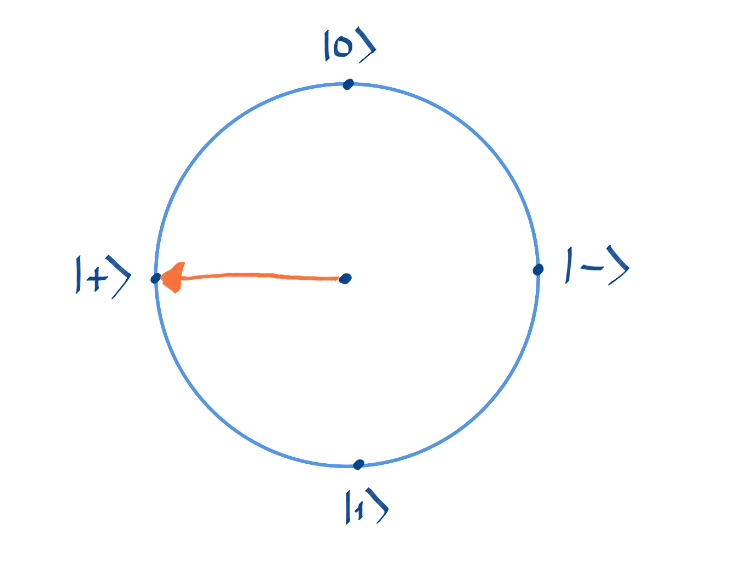

In the figure above, we are representing the state $|+\rangle$ on our circle, since the arrow points in this direction. This circumference is completely equivalent to the blue one, shown below inside the Bloch sphere.


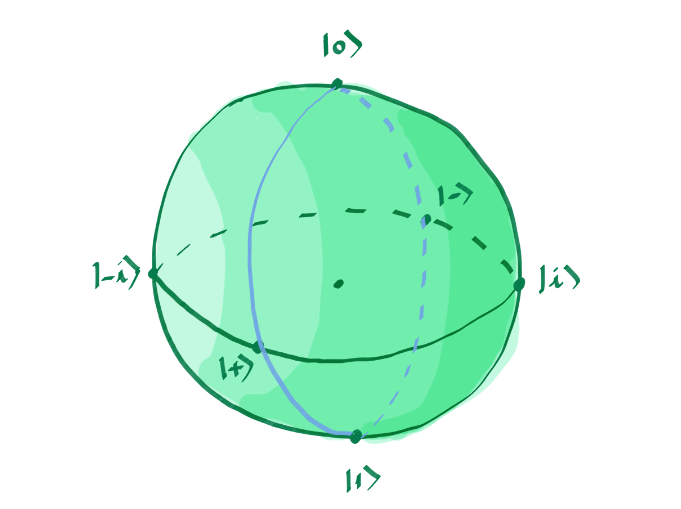

In Zenda and Reece's office, the new way to tell the time is to read two states in Bloch's circumference. The state $|0\rangle$ corresponds to 12h on a clock, $|1\rangle$ would be equivalent to 6h, $|+\rangle$ would be 9h, and so on. In this challenge we are going to work with 2 qubits. The first one corresponds to the hour hand and the second one to the minutes. You will be given the time of the day as the input and you will have to generate the quantum states equivalent to such time.


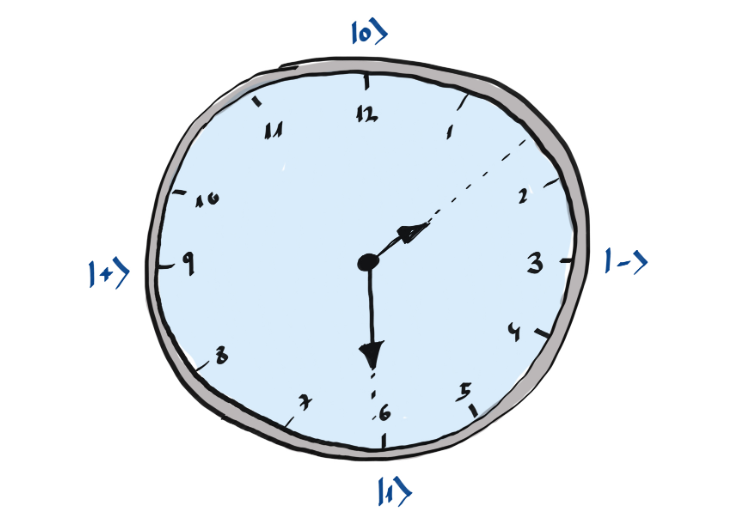

Here's an example of a clock striking 1:30. The qubit on the first wire of your circuit will be the small hand, and the qubit on the second wire, the big hand.

## Challenge code

You must complete the `time` function that will take the hour and minutes as an argument and generate the two-qubit state associated to the indicated time.

### Input

The input will be two integers. The one corresponding to the hours will take values from 1 to 12 and the one corresponding to the minutes will range from 0 to 59.

### Output

The output will be the vector of probabilities of the two-qubit state, measured in the computational basis. You are only asked to complete the gates, we'll handle the rest. Good luck!

## Solution

In [2]:
import json
import pennylane as qml
import pennylane.numpy as np

def circuit_left():
    """
    This function corresponds to the circuit on the left-hand side of the diagram in the 
    description. Simply place the necessary operations, you do not have to return anything.
    """
    qml.CNOT(wires = [0,1])
    qml.SWAP(wires = [0,1])
    qml.CNOT(wires = [1,2])
    qml.SWAP(wires = [0,1])
    

def circuit_right():
    """
    This function corresponds to the circuit on the right-hand side of the diagram in the 
    description. Simply place the necessary operations, you do not have to return anything.
    """
    qml.CNOT(wires = [0,1])
    qml.SWAP(wires = [0,1])
    qml.CNOT(wires = [1,2])
    qml.SWAP(wires = [0,1])
    qml.Hadamard(0)
    qml.CNOT(wires = [1,0])
    for i in range(7):
        qml.T(0)
    qml.SWAP(wires = [1,2])
    qml.CNOT(wires = [1,0])
    qml.SWAP(wires = [1,2])
    qml.T(0)
    qml.CNOT(wires = [1,0])
    for i in range(7):
        qml.T(0)
    qml.SWAP(wires = [1,2])
    qml.CNOT(wires = [1,0])
    qml.SWAP(wires = [1,2])
    qml.T(0)
    qml.T(1)
    qml.Hadamard(0)
    qml.CNOT(wires = [2,1])
    for i in range(7):
        qml.T(1)
    qml.T(2)
    qml.CNOT(wires = [2,1])
    
    qml.SWAP(wires = [0,1])
    qml.SWAP(wires = [1,2])


def U():
    """This operator generates a PauliX gate on a random qubit"""
    qml.PauliX(wires=np.random.randint(3))


dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit(alpha, beta, gamma):
    """Total circuit joining each block.

    Args: 
        alpha (float): The first parameter of a U3 gate.
        beta (float):The second parameter of a U3 gate. 
        gamma (float): The third parameter of a U3 gate. 
    
    Returns:
        (float): The expectation value of an observable.
    """
    qml.U3(alpha, beta, gamma, wires=0)
    circuit_left()
    U()
    circuit_right()

    # Here we are returning the expected value with respect to any observable,
    # the choice of observable is not important in this exercise.

    return qml.expval(0.5 * qml.PauliZ(2) - qml.PauliY(2))


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    angles = json.loads(test_case_input)
    output = circuit(*angles)
    return str(output)

def check(solution_output: str, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, atol=2e-1
    ), "The expected output is not quite right."

    ops = circuit.tape.operations

    for op in ops:
        assert not (0 in op.wires and 2 in op.wires), "Invalid connection between qubits."

    assert circuit.tape.observables[0].wires == qml.wires.Wires(2), "Measurement on wrong qubit."


test_cases = [['[2.0,1.0,3.0]', '-0.97322'], ['[-0.5,1.2,-1.2]', '0.88563'], ['[0.22,3.0,2.1]', '0.457152'], ['[2.22,3.1,-3.3]', '-0.335397'], ['[-0.2,-0.1,3.4]', '0.470199'], ['[-1.2,-1.1,0.4]', '-0.6494612']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[2.0,1.0,3.0]'...
Runtime Error. Must specify the wires that T acts on
Running test case 1 with input '[-0.5,1.2,-1.2]'...
Runtime Error. Must specify the wires that T acts on
Running test case 2 with input '[0.22,3.0,2.1]'...
Runtime Error. Must specify the wires that T acts on
Running test case 3 with input '[2.22,3.1,-3.3]'...
Runtime Error. Must specify the wires that T acts on
Running test case 4 with input '[-0.2,-0.1,3.4]'...
Runtime Error. Must specify the wires that T acts on
Running test case 5 with input '[-1.2,-1.1,0.4]'...
Runtime Error. Must specify the wires that T acts on


# 200 

In [165]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires=2, shots=1)
dev.operations.add("op")
dev.operations.add("C(op)")


@qml.qnode(dev)
def circuit(U):
    """This will be the circuit you will use to determine which of the two angles we have.
    Remember that only a single shot will be executed.

    Args:
        U (qml.ops): It is the gate to discriminate between  RY(2pi/3) or RY(4pi/3).

    Returns:
        (numpy.tensor): Vector of two elements representing the output measured in each of the qubits.
    """
    # Put your code here #
    # to use U,  call 'U(wires = <wire where you want to apply the gate>)'
    # to use Control-U, call 'qml.ctrl(U, control = <control wire>)(wires = <wire where you want to apply the gate>)'

    qml.Hadamard(0)
    qml.ctrl(U, control = 0)(wires = 1)

    qml.ctrl(U, control = 0)(wires = 1)
    qml.ctrl(U, control = 0)(wires = 1)
    qml.Hadamard(0)

    #qml.CNOT([0,1])

    #qml.RY(-2*np.arccos(np.sqrt(0.89)), 1)
    #qml.RX(2*np.arccos(np.sqrt(0.99)), 1)
    return qml.sample(wires=range(2))

def process_output(measurement):
    """This function processes the output of the circuit to discriminate between gates.

    Args:
        measurement (numpy.array): Output of the previous circuit a vector of dimension 2.

    Returns:
        (int): return 2 or 4 depending on the associated RY gate.
    """
    # Put your code here #
    if measurement[0] == 1:
        return 2
    if measurement[0] == 0:
        return 4


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    return None

def check(solution_output: str, expected_output: str) -> None:
    numbers = 2 * np.random.randint(1, 3, 5000)

    def U2(wires):
        class op(qml.operation.Operator):
            num_wires = 1

            def compute_decomposition(self, wires):
                raise ValueError("You cannot decompose this gate")

            def matrix(self):
                return qml.matrix(qml.RY(2 * np.pi / 3, wires=3))

        op(wires=wires)
        return None

    def U4(wires):
        class op(qml.operation.Operator):
            num_wires = 1

            def compute_decomposition(self, wires):
                raise ValueError("You cannot decompose this gate")

            def matrix(self):
                return qml.matrix(qml.RY(4 * np.pi / 3, wires=3))

        op(wires=wires)
        return None

    output = []
    k=0
    p=0
    for i in numbers:
        if i == 2:
            U = U2
        else:
            U = U4
        out = circuit(U)
        output.append(process_output(out))
        #print(out,process_output(out), i )
        if process_output(out) != i & i==4:
            k+=1
        if process_output(out) != i & i==2:
            p+=1
    print(k, p)
    

    assert np.allclose(
        output, numbers, rtol=1e-4
    ), "Your circuit does not give the correct output."


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
0 0
Correct!


In [164]:
dev = qml.device("default.qubit", wires=2)
dev.operations.add("op")
dev.operations.add("C(op)")


@qml.qnode(dev)
def circuit():
    """This will be the circuit you will use to determine which of the two angles we have.
    Remember that only a single shot will be executed.

    Args:
        U (qml.ops): It is the gate to discriminate between  RY(2pi/3) or RY(4pi/3).

    Returns:
        (numpy.tensor): Vector of two elements representing the output measured in each of the qubits.
    """
    # Put your code here #
    # to use U,  call 'U(wires = <wire where you want to apply the gate>)'
    # to use Control-U, call 'qml.ctrl(U, control = <control wire>)(wires = <wire where you want to apply the gate>)'
    
    W = np.array([[1/np.sqrt(3), -1j*np.sqrt(2/3)],[1j*np.sqrt(2/3),1/np.sqrt(3)]])
    Wd = np.array([[1/np.sqrt(3), 1j*np.sqrt(2/3)],[-1j*np.sqrt(2/3),1/np.sqrt(3)]])
    Wd = Wd.T
    qml.QubitUnitary(W, wires = 0)
    qml.PauliX(0)
    qml.CRY(4*np.pi/3, [0,1])
    
    qml.CRY(4*np.pi/3, [0,1])
    qml.CRY(4*np.pi/3, [0,1])
    
    qml.QubitUnitary(Wd, wires = 0)

    #qml.CNOT([0,1])

    #qml.RY(-2*np.arccos(np.sqrt(0.5)), 0)

    #qml.RX(2*np.arccos(np.sqrt(0.15)), 1)
    return qml.probs(wires=[0,1])

print(circuit())

[3.08148791e-33 1.00661938e-31 1.11111111e-01 5.03309692e-32]


# secrets in spacetime


In [167]:
import json
import pennylane as qml
import pennylane.numpy as np

def U_psi(theta):
    """
    Quantum function that generates |psi>, Zenda's state wants to send to Reece.

    Args:
        theta (float): Parameter that generates the state.

    """
    qml.Hadamard(wires = 0)
    qml.CRX(theta, wires = [0,1])
    qml.CRZ(theta, wires = [0,1])

def is_unsafe(alpha, beta, epsilon):
    """
    Boolean function that we will use to know if a set of parameters is unsafe.

    Args:
        alpha (float): parameter used to encode the state.
        beta (float): parameter used to encode the state.
        epsilon (float): unsafe-tolerance.

    Returns:
        (bool): 'True' if alpha and beta are epsilon-unsafe coefficients. 'False' in the other case.

    """
    dev = qml.device("default.qubit", wires=2)
    
    @qml.qnode(dev)
    def circuit(theta):
        U_psi(theta)
        coeffs = [1, 1]
        obs = [qml.RZ(alpha, wires = 0) @ qml.RZ(alpha, wires = 1), qml.RX(beta, wires= 0) @ qml.RX(beta, wires = 1)]
        H = qml.Hamiltonian(coeffs, obs)
        return qml.expval(H)
    
    angles = np.arange(0, 2*np.pi, 0.01)
    for theta in angles:
        if circuit(theta) >= 1 - epsilon:
            return True
    
    return False
    
    

# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    output = is_unsafe(*ins)
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    
    def bool_to_int(string):
        if string == "True":
            return 1
        return 0

    solution_output = bool_to_int(solution_output)
    expected_output = bool_to_int(expected_output)
    assert solution_output == expected_output, "The solution is not correct."


test_cases = [['[0.1, 0.2, 0.3]', 'True'], ['[1.1, 1.2, 0.3]', 'False'], ['[1.1, 1.2, 0.4]', 'True'], ['[0.5, 1.9, 0.7]', 'True']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[0.1, 0.2, 0.3]'...
Runtime Error. Could not create circuits. Some or all observables are not valid.
Running test case 1 with input '[1.1, 1.2, 0.3]'...
Runtime Error. Could not create circuits. Some or all observables are not valid.
Running test case 2 with input '[1.1, 1.2, 0.4]'...
Runtime Error. Could not create circuits. Some or all observables are not valid.
Running test case 3 with input '[0.5, 1.9, 0.7]'...
Runtime Error. Could not create circuits. Some or all observables are not valid.
